### Customer Churn Analysis
##### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [204]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Getting Statistical information of the DataSet

In [206]:
df.shape

(7043, 21)

- we have 7043 rows and 21 columns 

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There is combination of int,object and float type data in the dataset
- The dependent varibale Churn is of object type and comes under classification problem

In [208]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [209]:
df['SeniorCitizen'].unique()

array([0, 1])

In [210]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [211]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [212]:
print(f'The max tenurity of the customer in the data set is {max(df["tenure"].unique())}')
print(f'The min tenurity of the customer in the data set is {min(df["tenure"].unique())}')

The max tenurity of the customer in the data set is 72
The min tenurity of the customer in the data set is 0


In [213]:
len(df['MonthlyCharges'].unique())

1585

- There are 1585 values unique in the data set MonthlyCharges feature
--------------------------------------------------------------------------------------

* From the above lines of code we can consider SeniorCitizen feature as categeorical feature
* Monthly charges has unique data but with some good amount we can say it as oridinal classification data

#### Checking Categeorical variables

In [214]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
print(f"- We have {len(features_list)} features with object type in the dataset")
features_list

- We have 18 features with object type in the dataset


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

#### Now checking its unique type

In [215]:
# Lets find the unique values which are present in categeorical columns
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
--------------------------------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------------------------


- Customer ID is unique ID generated to quickly identify Customer with out duplications
    * This is not useful for our model creation we can drop the feature
- Gender : Whether the customer is male or female
- Partner : This Feature Speaks about whether the customer has any partner or not
- Dependents: This Feature Speaks about whether the customer has any dependents or not
- PhoneService: Speaks about the customer has the phone service or not
- MultipleLines feature speaks about whether the customer has multiple lines or not
    * we have 3 unique values here(yes,no,No phone service)
    * The third variable no phone service belongs to Phone service feature here we need some analaysis.
- InternetService : Customers internet service provider
- OnlineSecurity : Speaks about whether the customer has online security or not.
- OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies has yes,no, no internet service.
    * I think most of the features id dependent with the internet service
- Contract: This Speaks about the subscriptions
- PaperlessBilling : Name itself says billing with out paper
- PaymentMethod: Mode of Payment
- TotalCharges

In [216]:
#### Dropping Customer ID column as it is not useful in model building
df.drop('customerID',axis=1,inplace=True)

#### Checking for any null values present in dataframe

<AxesSubplot:>

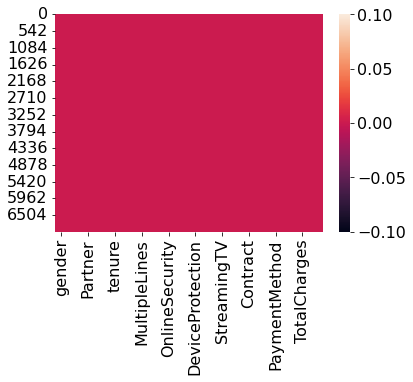

In [217]:
sns.heatmap(df.isnull())

In [218]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no NaN values present in the dataset

### Visualization
#### Univariate Analaysis

<AxesSubplot:xlabel='gender', ylabel='count'>

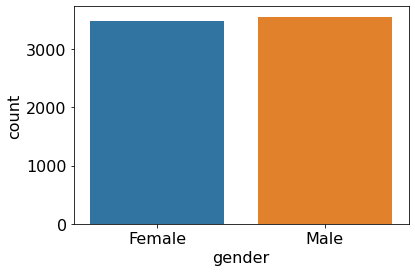

In [219]:
sns.countplot(df['gender'])

- There are same amount of data present in both variables we can say data is balanced

<AxesSubplot:xlabel='Partner', ylabel='count'>

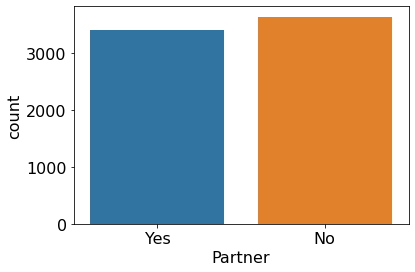

In [220]:
sns.countplot(df['Partner'])

- There are atmost same amount of data present in both variables we can say data is balanced,Compared to No we have less information for yes variable

([<matplotlib.patches.Wedge at 0x7fd4c2140730>,
 [Text(-0.05860659335486817, 1.0984376483056912, 'No'),
  Text(0.05860649051171347, -1.0984376537928315, 'Yes')],
 [Text(-0.031967232739019, 0.5991478081667406, '51.70%'),
  Text(0.031967176642752795, -0.5991478111597263, '48.30%')])

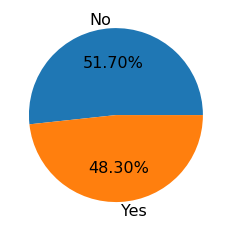

In [221]:
labels = ['No','Yes']
plt.pie(df['Partner'].value_counts(),autopct='%1.2f%%',labels=labels)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

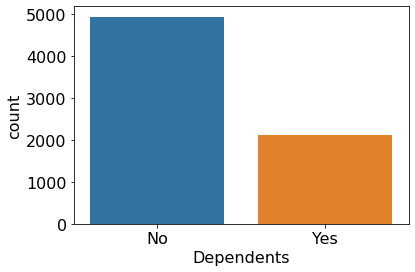

In [222]:
sns.countplot(df['Dependents'])

([<matplotlib.patches.Wedge at 0x7fd4c22f7af0>,
 [Text(-0.6477143548699043, 0.8890816129554497, 'No'),
  Text(0.6477142716280732, -0.8890816735988404, 'Yes')],
 [Text(-0.35329873901994774, 0.48495360706660884, '70.04%'),
  Text(0.35329869361531263, -0.48495364014482195, '29.96%')])

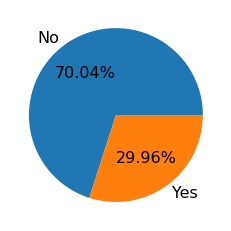

In [223]:
labels = ['No','Yes']
plt.pie(df['Dependents'].value_counts(),autopct='%1.2f%%',labels=labels)

- 70% of the data has no dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

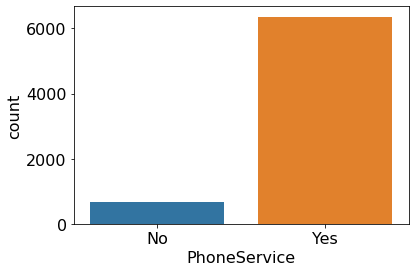

In [224]:
sns.countplot(df['PhoneService'])

([<matplotlib.patches.Wedge at 0x7fd4e22a5820>,
 [Text(-1.0494915966975706, 0.3294956577273572, 'Yes'),
  Text(1.049491627547176, -0.3294955594668612, 'No')],
 [Text(-0.5724499618350385, 0.17972490421492213, '90.32%'),
  Text(0.5724499786620959, -0.1797248506182879, '9.68%')])

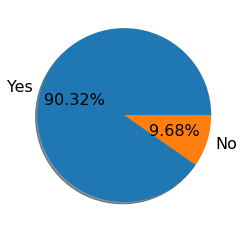

In [225]:
labels = ['Yes','No']
plt.pie(df['PhoneService'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- 90.32% of people are have phone services
- 9.68 % of people are not using phone services

([<matplotlib.patches.Wedge at 0x7fd50192e580>,
 [Text(0.06448547450707494, 1.0981082021265471, 'No'),
  Text(-0.39045359439184046, -1.0283705512248453, 'Yes'),
  Text(1.0494915658479562, -0.32949575598785064, 'No phone service')],
 [Text(0.035173895185677234, 0.5989681102508438, '48.13%'),
  Text(-0.21297468785009477, -0.5609293915771884, '42.18%'),
  Text(0.572449945007976, -0.17972495781155487, '9.68%')])

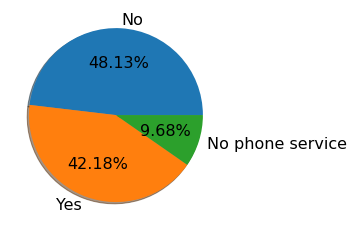

In [226]:
labels = ['No','Yes','No phone service']
plt.pie(df['MultipleLines'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- MOstly 48.13% and 42.18% people are using multiple lines

([<matplotlib.patches.Wedge at 0x7fd4e2623cd0>,
 [Text(0.20752658810331015, 1.0802465992680557, 'Fiber optic'),
  Text(-0.8411049099748846, -0.7089023419457307, 'DSL'),
  Text(0.8548554654106661, -0.6922587184409551, 'No')],
 [Text(0.11319632078362371, 0.5892254177825758, '43.96%'),
  Text(-0.458784496349937, -0.38667400469767127, '34.37%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

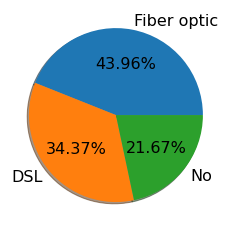

In [227]:
labels = ['Fiber optic','DSL','No']
plt.pie(df['InternetService'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- Usage od Internet Services
    * Fiber optic : 43.96%
    * DSL : 34.37%
    * No : 21.67%

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

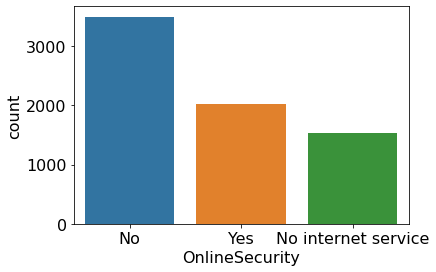

In [228]:
sns.countplot(df['OnlineSecurity'])

- Most of the people are not using online security

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

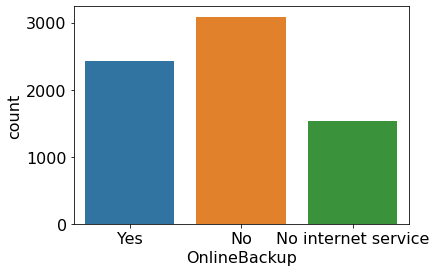

In [229]:
sns.countplot(df['OnlineBackup'])

- Most of the customers has no online backup
- Comapred to No there are alos customers who has online backup but comapred to No it is low

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

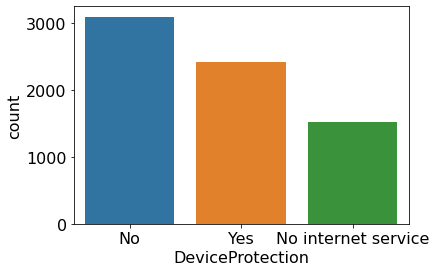

In [230]:
sns.countplot(df['DeviceProtection'])

- Most of the customers has no Device Protection
- Comapred to No there are also customers who has Device protection but comapred to No it is low

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

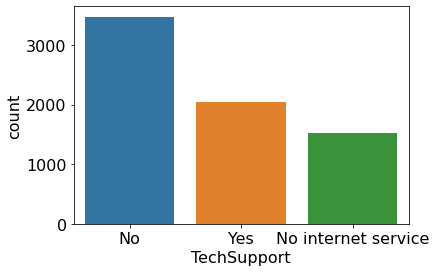

In [231]:
sns.countplot(df['TechSupport'])

([<matplotlib.patches.Wedge at 0x7fd4a305b640>,
 [Text(0.023795397047164612, 1.0997425967376948, 'No'),
  Text(-0.7105891537173198, -0.8396803288271695, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.012979307480271604, 0.5998595982205608, '49.31%'),
  Text(-0.38759408384581073, -0.45800745208754695, '29.02%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

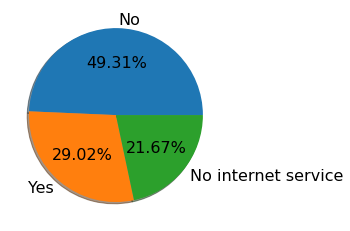

In [232]:
labels = ['No', 'Yes', 'No internet service']
plt.pie(df['TechSupport'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- Most of the customers has no TechSupport plan
- Comapred to No there are also customers who has Techsupport but comapred to No it is low

([<matplotlib.patches.Wedge at 0x7fd4c246f0d0>,
 [Text(0.3432768520552361, 1.0450650711046885, 'No'),
  Text(-0.9244614473012522, -0.5961300465952661, 'Yes'),
  Text(0.8548553357827735, -0.692258878515633, 'No internet service')],
 [Text(0.18724191930285602, 0.5700354933298301, '39.90%'),
  Text(-0.5042516985279557, -0.3251618435974179, '38.44%'),
  Text(0.4662847286087855, -0.3775957519176179, '21.67%')])

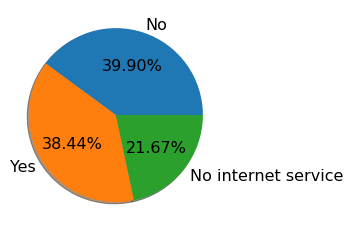

In [233]:
labels = ['No', 'Yes', 'No internet service']
plt.pie(df['StreamingTV'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- 40% of customers has no streaming tv plan
- 38% customers has streaming tv plan
- 21.67% has no internet service

([<matplotlib.patches.Wedge at 0x7fd4e2712610>,
 [Text(0.3549092210143265, 1.0411721494733732, 'No'),
  Text(-0.9310514684948953, -0.5857842290583618, 'Yes'),
  Text(0.8548554654106661, -0.6922587184409551, 'No internet service')],
 [Text(0.19358684782599625, 0.5679120815309308, '39.54%'),
  Text(-0.50784625554267, -0.31951867039547005, '38.79%'),
  Text(0.46628479931490874, -0.37759566460415733, '21.67%')])

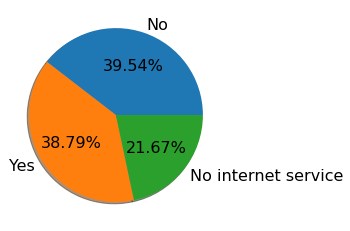

In [234]:
labels = ['No', 'Yes', 'No internet service']
plt.pie(df['StreamingMovies'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- 40% of customers has no StreamingMovies plan
- 38% customers has StreamingMovies plan
- 21.67% has no internet service

<AxesSubplot:xlabel='Contract', ylabel='count'>

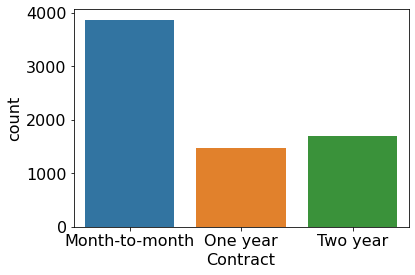

In [235]:
sns.countplot(df['Contract'])

- customers with Month-to-month subscription are more in the dataset
- Two year, One year has mostly equal amount of customers

([<matplotlib.patches.Wedge at 0x7fd4c2c32e80>,
 [Text(-0.31424730634794096, 1.0541577825226467, 'Yes'),
  Text(0.31424730634794046, -1.0541577825226467, 'No')],
 [Text(-0.17140762164433143, 0.5749951541032617, '59.22%'),
  Text(0.17140762164433113, -0.5749951541032617, '40.78%')])

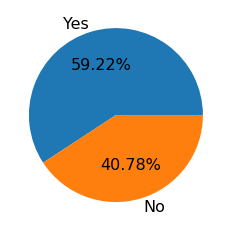

In [236]:
labels = ['Yes','No']
plt.pie(df['PaperlessBilling'].value_counts(),autopct='%1.2f%%',labels=labels)

- 59.22% has opted for PaperlessBilling

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

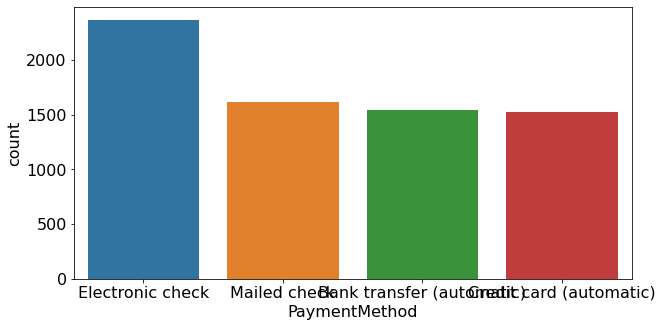

In [237]:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])

- Most of the customers has opted for Electronic check payment method
- Mailed check,Bank transfer(automatic), Credit card(automatic) has mostly equal amount of customers

#### Bivariate Analaysis

In [238]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
print(f"- We have {len(features_list)} features with object type in the dataset")
features_list

- We have 17 features with object type in the dataset


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

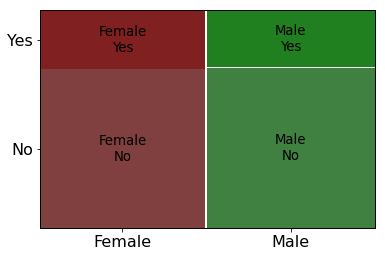

In [239]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(df, ['gender', 'Churn']);

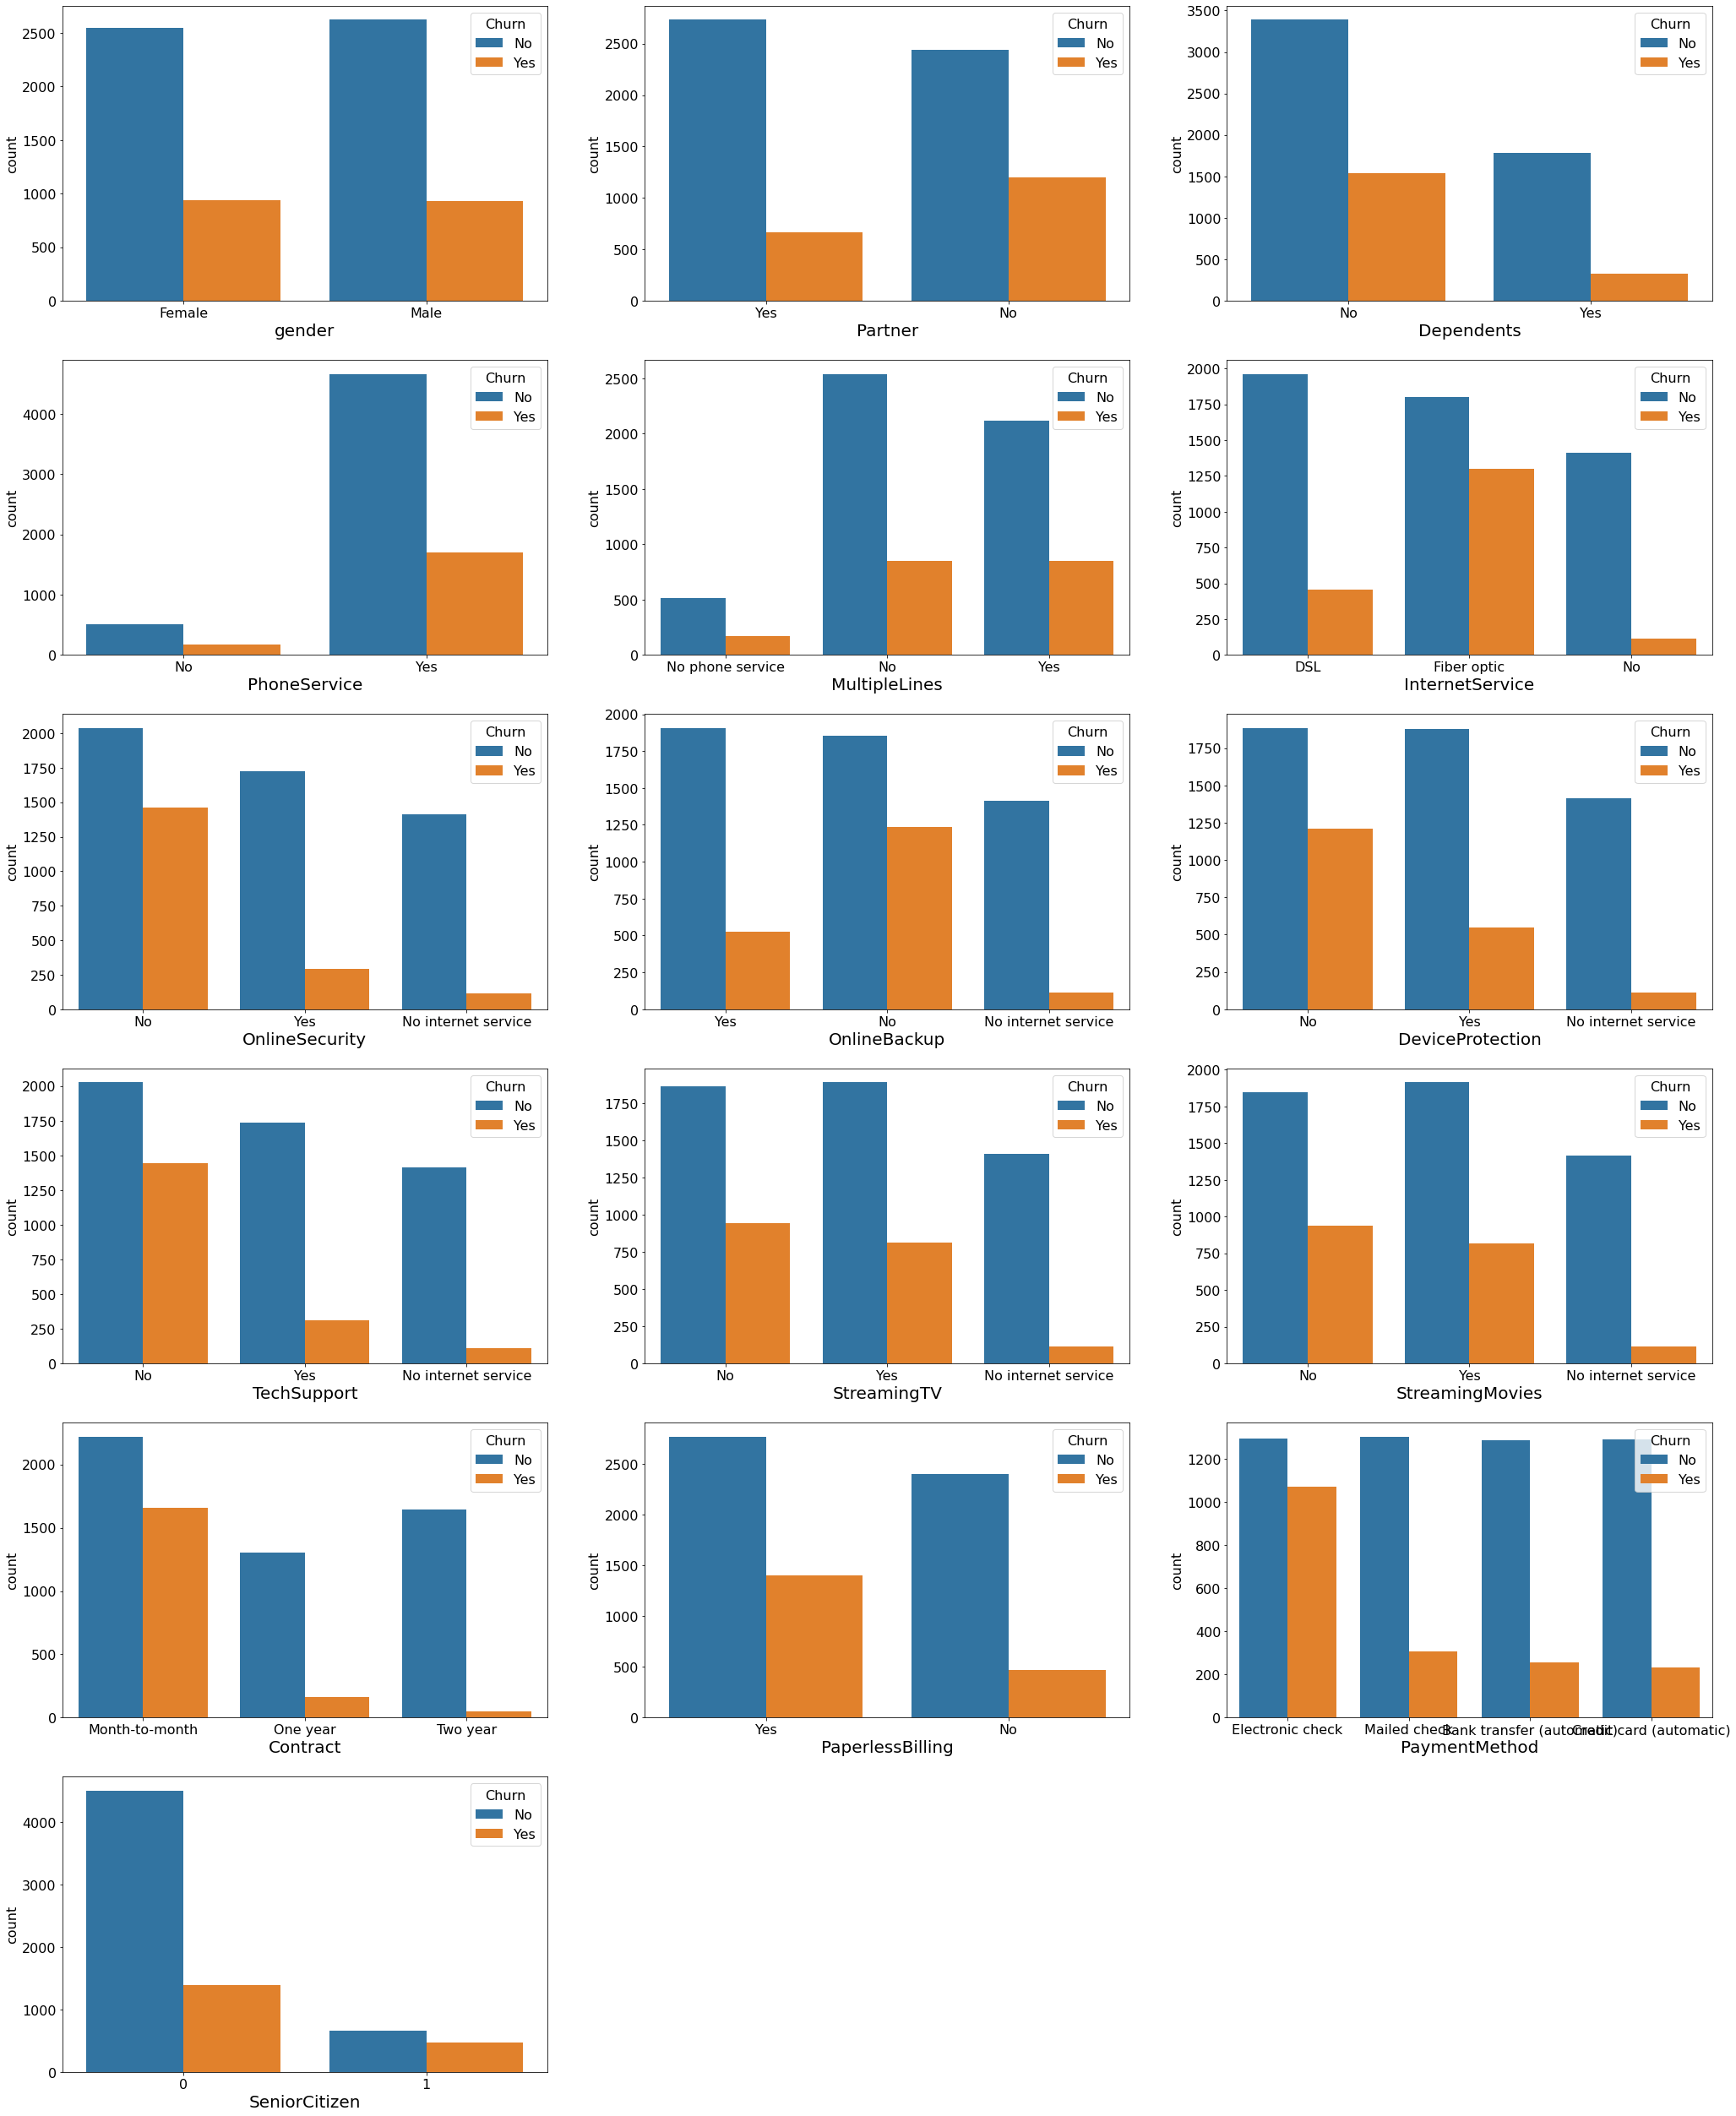

In [240]:
plt.figure(figsize=(35,45),facecolor='white')
cat_ftrs = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen']
pltnum=1
for feature in cat_ftrs:
    plt.subplot(6,3,pltnum)
    sns.countplot(x=df[feature], hue='Churn', data=df)
    plt.xlabel(feature,fontsize=20)
    pltnum+=1
plt.show()

#### Observation
- gender
    * There is equal amount of churn yes and churn no in both male and female.
    * Not good indication to decide
- partner
    * Those who has partners are less contributing with churn rate
    * Those customers who doesnt have partners are contributing more with churn rate
- Dependents
    * Those who have dependents contribute less to churn rate
    * Who are not having dependents are contrbuting more with churn rate in Dataset
- PhoneService
    * Customers who availed  phone service has reatined more  and also has some churn rate
    * Customers who didnt avail phone service are less retained in count and also has less churn contribution
- MultipleLines
    * Those who doesnt have MultipleLines are retained more
- InternetService
    * Those who opted Fiberoptic as internet service followed by DSL are contrbuting with Churn
- OnlineSecurity
    * Customers who are not opted for OnlineSecurity has contributed more to churn rate
- OnlineBackup
    * Customers who didnt opt OnlineBackup has contributed more with churn rate
- DeviceProtection
    * Customers who didnt opt DeviceProtection contribute more with churn
- TechSupport
    * Customers who didnt opt TechSupport contribute more with churn
- StreamingTV
    * Customers who didnt opt or opted for StreamingTV contribute mostly equally with churn
    * So not a good factor to decide
- StreamingMovies
    * Customers who didnt opt or opted for StreamingMovies contribute mostly equally with churn
    * So not a good factor to decide 
- Contract
    * Customers who opted month-to-month has high churn rate comparing with others
- PaperlessBilling
    * Customers who avail paper less billing contributed more to churn
- PaymentMethod
    * Customers who pay via electronic check contribute more with churn rate
- SeniorCitizen
    * Customers who are not senior citized contributed more with churn rate

([<matplotlib.patches.Wedge at 0x7fd4a362bca0>,
 [Text(-0.7393678277834755, 0.8144539368428058, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.40329154242735027, 0.44424760191425766, '73.46%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.54%')])

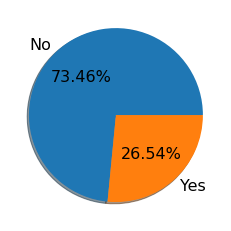

In [241]:
labels = ['No', 'Yes']
plt.pie(df['Churn'].value_counts(),autopct='%1.2f%%',labels=labels,shadow=True)

- We can see 26.54% contribution of churn rate in total data

#### Bar plot with gender,Tenure with respext to churn

<AxesSubplot:xlabel='gender', ylabel='tenure'>

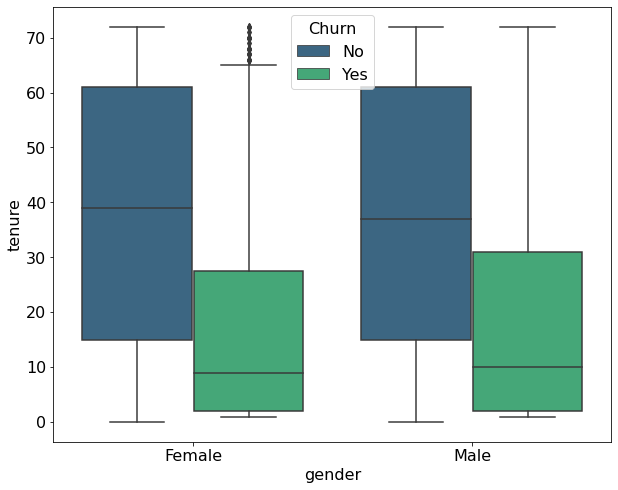

In [242]:
plt.figure(figsize=(10,8),facecolor='white')
sns.boxplot(data=df,x='gender',y='tenure',hue='Churn',palette='viridis')

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

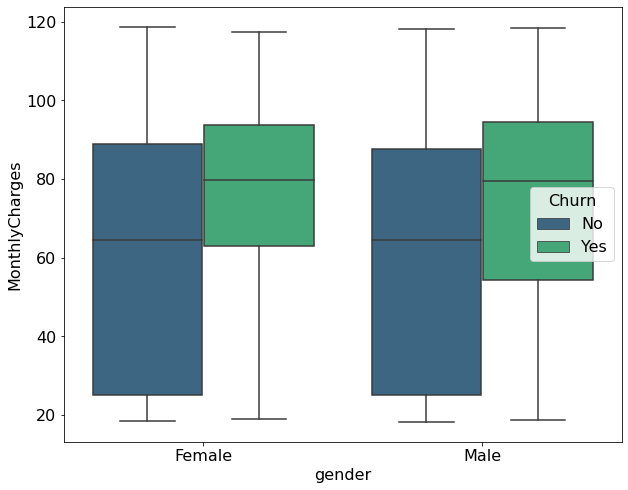

In [243]:
plt.figure(figsize=(10,8),facecolor='white')
sns.boxplot(data=df,x='gender',y='MonthlyCharges',hue='Churn',palette='viridis')

- Customers who have highest monthly charges contribute more with churn rate

#### Relationship between total charges and tenure

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

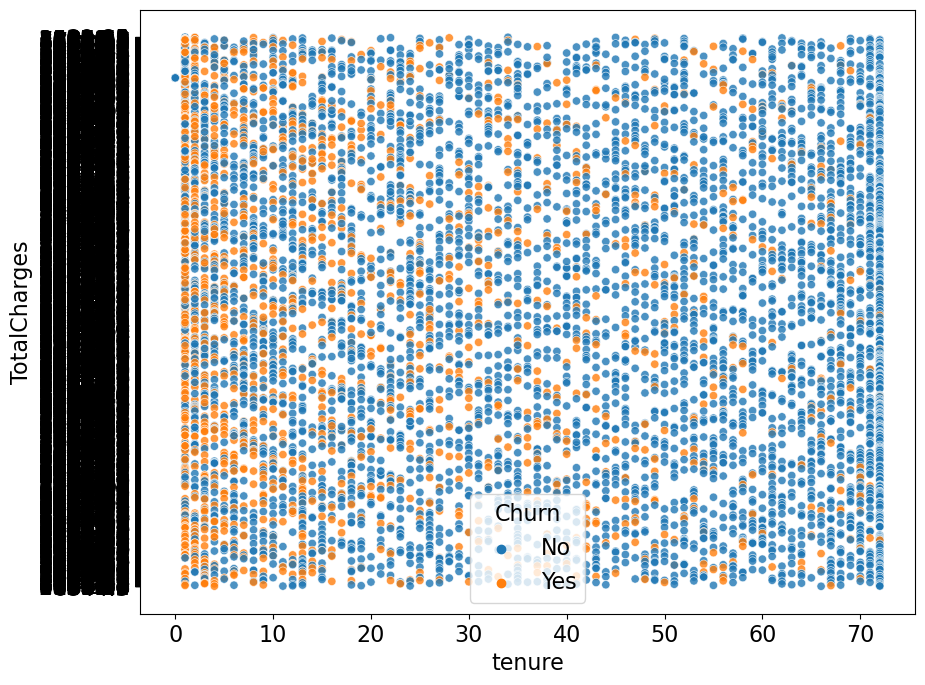

In [244]:
plt.figure(figsize=(10,8),facecolor='white',dpi=100)
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn',alpha=0.8)

#### Changing Total charges to int type as it belong to that

In [245]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [246]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Using KNN imputation technique for handling null values

In [247]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
df[['TotalCharges']] = imp.fit_transform(df[['TotalCharges']])

In [248]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- All the null values are removed now

In [249]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

#### Checking for outliers in continuous data

In [250]:
#checking for continuous features
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='int64' or df.dtypes[feature_type]=='float64':
        features_list.append(feature_type)
print(f"- We have {len(features_list)} features with object type in the dataset")
features_list

- We have 4 features with object type in the dataset


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

- Not considering Senior citizen

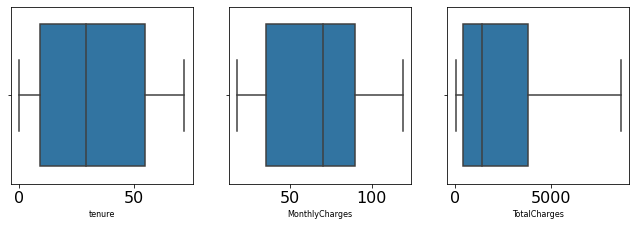

In [251]:
x = df.drop(columns = ['Churn'])
y = df['Churn']
plt.figure(figsize=(15,15),facecolor='white')
plotnum=1
for col in x[['tenure', 'MonthlyCharges', 'TotalCharges']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=8)
    plotnum+=1
plt.show()

- No Outliers are present in the continuous data

#### Checking for skewness

In [252]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

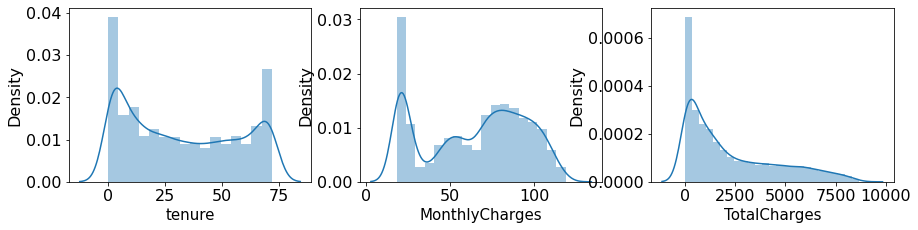

In [253]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in x[['tenure', 'MonthlyCharges', 'TotalCharges']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

- TotalCharges has left skewness in the data
- tenure has bimodal distribution
- MonthlyCharges has multimodal distribution
- Considerable skewness is with TotalCharges

### Removing skewness using yeo-johnson method

In [254]:
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method = 'yeo-johnson', standardize=True)
nor_df = x[['TotalCharges']]
transformed= power_transform.fit_transform(nor_df)
transformed = pd.DataFrame(transformed, columns=nor_df.columns)
transformed

,TotalCharges
0,-1.810588
1,0.253313
2,-1.387269
3,0.232253
4,-1.250118
...,...
7038,0.295688
7039,1.567097
7040,-0.859899
7041,-0.922968


In [255]:
transformed.index = df.index
df[['TotalCharges']] = transformed[['TotalCharges']]
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

- Now there is no skewness present in the data

#### Encoding the categeorical features using ordinal encoder

In [256]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]= oe.fit_transform(df[col].values.reshape(-1,1))

In [257]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


- Now all the values are converted into numericals

<AxesSubplot:>

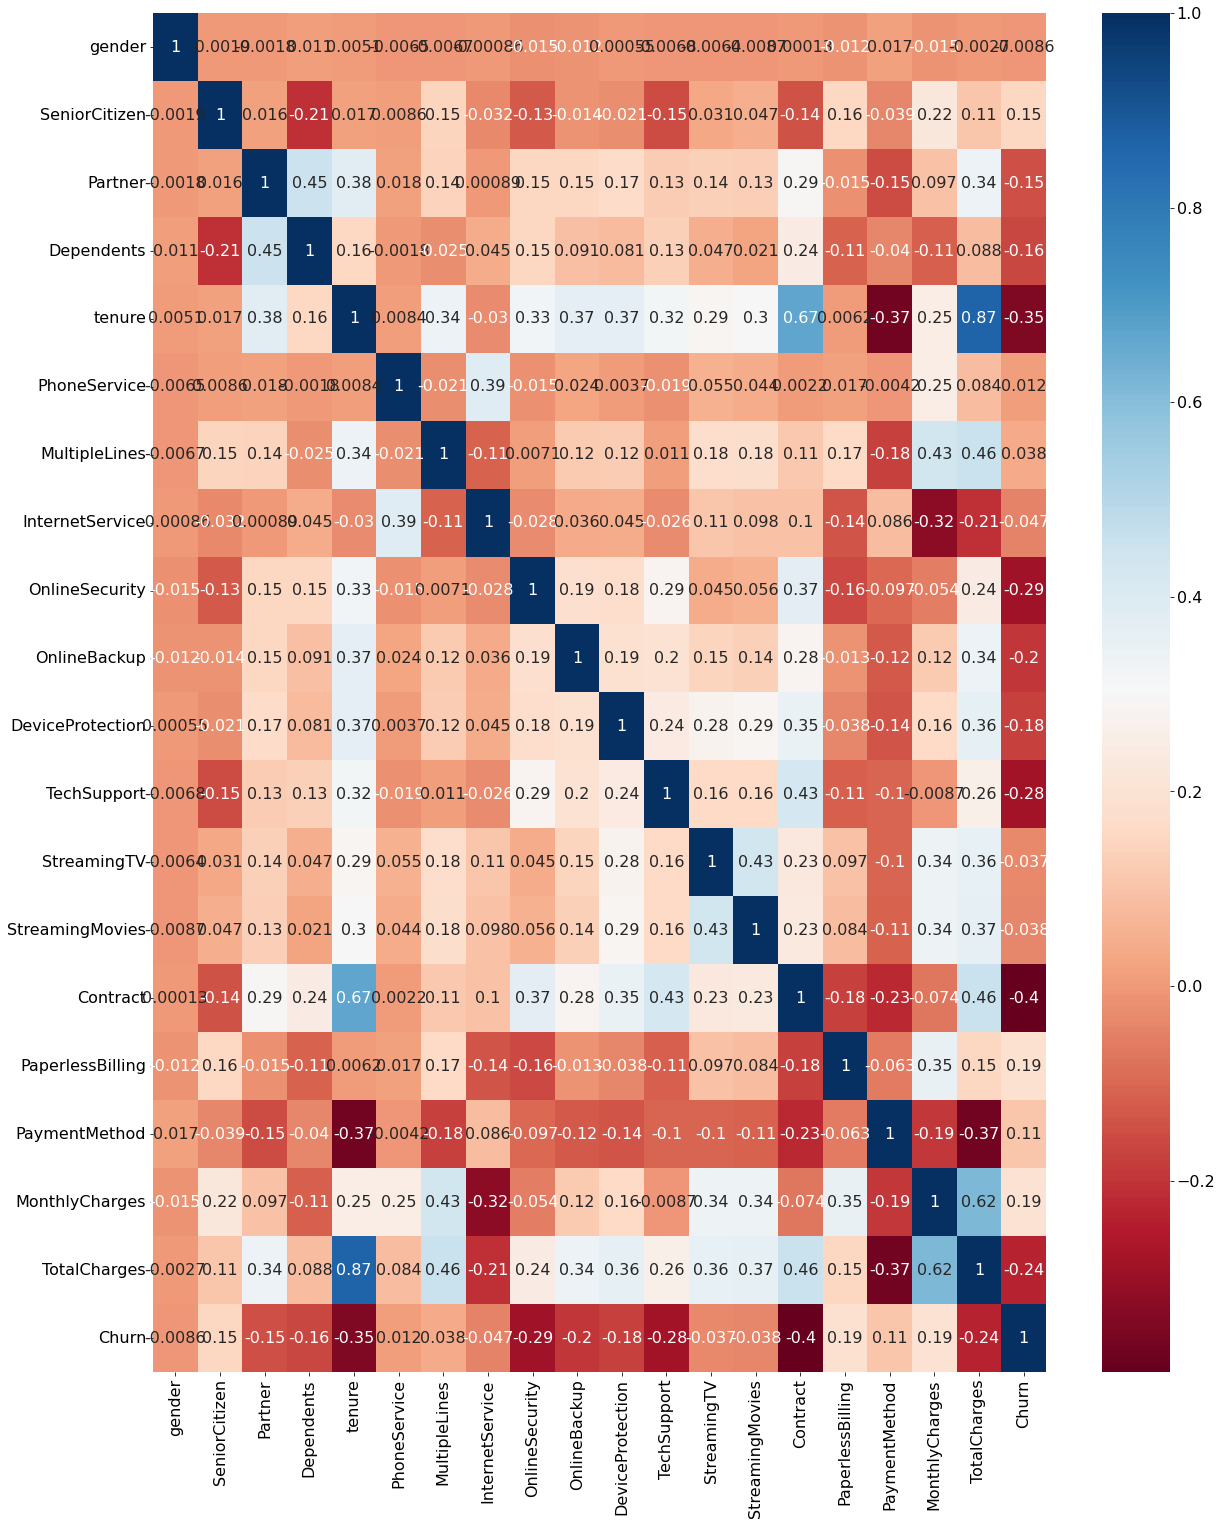

In [258]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

<AxesSubplot:>

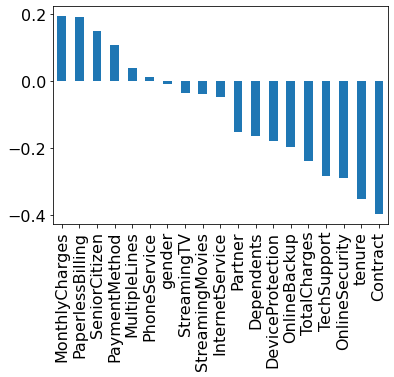

In [259]:
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')

- MonthlyCharges,PaperBilling,SeniorCitizen,paymentmethod,MultipleLines,PhoneService has positive correlation
- Remaining other features has neagtive correlation

#### Standardization

In [260]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns = ['Churn'])
y = df['Churn']
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

#### Checking for multicollinearity using Variation inflation factor

In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(scaled_x):
    #Calculating VIF
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
    return vif
calc_VIF(scaled_x)

,Features,VIF
0,gender,1.001684
1,SeniorCitizen,1.149730
2,Partner,1.463075
3,Dependents,1.384396
4,tenure,10.690306
5,PhoneService,1.622399
6,MultipleLines,1.397403
7,InternetService,1.866643
8,OnlineSecurity,1.252550
9,OnlineBackup,1.188767


- Tenure and TotalCharges has highest multicollinearity

### Finding Principle Component Analaysis

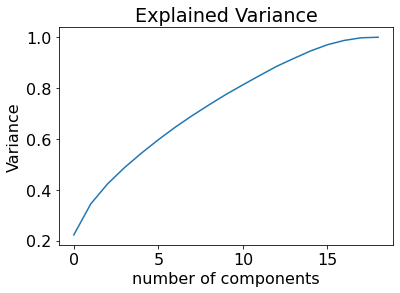

In [262]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

15+ about features explain about 95% of variance in data

### k-best-features

In [263]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best_features = SelectKBest(score_func=f_classif, k=19)
best_fit = k_best_features.fit(x,y)
dfscores = pd.DataFrame(best_fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(20,'Score'))

             Feature        Score
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   419.355530
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674
5       PhoneService     1.004266
0             gender     0.522257


#### Dropping column with lowest score and highest multicollinearity

In [264]:
x_best = x.drop(columns=['gender','TotalCharges'])
scaled_x_best = scalar.fit_transform(x_best)

In [265]:
df['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

as there is imbalance in data we need to balance it

In [266]:
from imblearn.over_sampling import SMOTE as se
smt_x,smt_y = se().fit_resample(scaled_x_best,y)

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error, roc_auc_score, plot_roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

#### Finding the best Random State

In [268]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .33, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8588579795021962 on random_state: 81


In [269]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = 79)

In [274]:
models = [LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,smt_x,smt_y,cv=4).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print("Accuracy :", classification_report(y_test,model_predict))
        print("ROC AUC Scores", roc_auc_score(y_test,  model_predict))
        print('_______________________________________________')
compare_models()

R2 score of the model :  LogisticRegression() = 13.7 %
mean squared error for model :  LogisticRegression() = 0.21571072319201995
cross val score for model :  LogisticRegression() = 0.7754155392346347
Accuracy :               precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      1599
         1.0       0.77      0.81      0.79      1609

    accuracy                           0.78      3208
   macro avg       0.79      0.78      0.78      3208
weighted avg       0.79      0.78      0.78      3208

ROC AUC Scores 0.7842016704815898
_______________________________________________
R2 score of the model :  SVC() = 25.2 %
mean squared error for model :  SVC() = 0.18703241895261846
cross val score for model :  SVC() = 0.8001546192500967
Accuracy :               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80      1599
         1.0       0.79      0.85      0.82      1609

    accuracy                           0.81     

### AUC ROC Curves

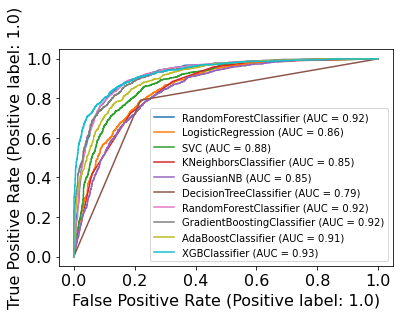

In [277]:
disp = plot_roc_curve(RandomForestClassifier().fit(x_train,y_train),x_test,y_test)
for i in models:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

###  Based on roc auc scores and accuracy iam going with XGBClassifier
##### HyperParameterTuning

In [279]:
from sklearn.model_selection import GridSearchCV
xgb_params = {'max_depth':[10,20,30,50,60,70,80],
              'booster':['gbtree','gblinear'],
              'eta':[0.001,0.01,0.1,0.2,0.3,1],
              'subsample':[0.5,1],
              'min_child_weight':np.arange(5)
             }
grid_classifier = GridSearchCV(XGBClassifier(),xgb_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
[17:25:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if

[17:25:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:57] WARNING: /Users/runner/wo

[17:25:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:58] WARNING: /Users/runner/wo

[17:25:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:59] WARNING: /Users/runner/wo

[17:25:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:25:59] WARNING: /Users/runner/wo

[17:25:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:00] WARNING: /Users/runner/wo

[17:26:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:02] WARNING: /Users/runner/wo

[17:26:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:03] WARNING: /Users/runner/wo

[17:26:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:04] WARNING: /Users/runner/wo

[17:26:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:05] WARNING: /Users/runner/wo

[17:26:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:05] WARNING: /Users/runner/wo

[17:26:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:06] WARNING: /Users/runner/wo

[17:26:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:09] WARNING: /Users/runner/wo

[17:26:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:09] WARNING: /Users/runner/wo

[17:26:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:10] WARNING: /Users/runner/wo

[17:26:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:11] WARNING: /Users/runner/wo

[17:26:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:12] WARNING: /Users/runner/wo

[17:26:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:12] WARNING: /Users/runner/wo

[17:26:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:15] WARNING: /Users/runner/wo

[17:26:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:16] WARNING: /Users/runner/wo

[17:26:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:16] WARNING: /Users/runner/wo

[17:26:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:17] WARNING: /Users/runner/wo

[17:26:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:18] WARNING: /Users/runner/wo

[17:26:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:18] WARNING: /Users/runner/wo

[17:26:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:21] WARNING: /Users/runner/wo

[17:26:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:22] WARNING: /Users/runner/wo

[17:26:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:22] WARNING: /Users/runner/wo

[17:26:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:23] WARNING: /Users/runner/wo

[17:26:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:24] WARNING: /Users/runner/wo

[17:26:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:24] WARNING: /Users/runner/wo

[17:26:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:27] WARNING: /Users/runner/wo

[17:26:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:28] WARNING: /Users/runner/wo

[17:26:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:28] WARNING: /Users/runner/wo

[17:26:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:30] WARNING: /Users/runner/wo

[17:26:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:30] WARNING: /Users/runner/wo

[17:26:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:30] WARNING: /Users/runner/wo

[17:26:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:33] WARNING: /Users/runner/wo

[17:26:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:34] WARNING: /Users/runner/wo

[17:26:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:34] WARNING: /Users/runner/wo

[17:26:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:36] WARNING: /Users/runner/wo

[17:26:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:36] WARNING: /Users/runner/wo

[17:26:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:37] WARNING: /Users/runner/wo

[17:26:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:39] WARNING: /Users/runner/wo

The best parameters are {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1}
The best Score is 0.8477591036414566
[17:26:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some pa

[17:26:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:43] WARNING: /Users/runner/wo

[17:26:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:40] WARNING: /Users/runner/wo

[17:26:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:26:45] WARNING: /Users/runner/wo

The best parameters are {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1}
The best Score is 0.8477591036414566

In [280]:
best_mod = XGBClassifier(booster='gbtree', eta=0.1,max_depth=10,min_child_weight=1,subsample=1)
best_mod.fit(x_train,y_train)
xgpred = best_mod.predict(x_test)
acc_score = accuracy_score(y_test,xgpred)
print(acc_score)

0.8538029925187033


### Got Accuracy as 85.3%

#### Saving the Model

In [281]:
import joblib
joblib.dump(best_mod, 'Customer_churn.pkl')

['Customer_churn.pkl']

#### Loading the model

In [282]:
mod = joblib.load('Customer_churn.pkl')
print(mod.predict(x_test))

[1 1 1 ... 1 0 1]


In [284]:
prediction_accuracy = pd.DataFrame({"Predicted_values" : mod.predict(x_test), "Actual_values":y_test})
prediction_accuracy

,Predicted_values,Actual_values
9167,1,1.0
7827,1,1.0
6288,1,0.0
9507,1,1.0
2854,0,0.0
...,...,...
6358,0,0.0
5331,0,0.0
695,1,0.0
6079,0,0.0
